In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs 
from sklearn.metrics import accuracy_score

[[ 4.21850347  2.23419161]
 [ 0.90779887  0.45984362]
 [-0.27652528  5.08127768]
 [ 0.08848433  2.32299086]
 [ 3.24329731  1.21460627]
 [ 1.44193252  2.76754364]
 [ 1.0220286   4.11660348]
 [ 3.97820955  2.37817845]
 [ 0.58894326  4.00148458]
 [ 1.25185786  0.20811388]
 [ 0.62835793  4.4601363 ]
 [ 1.68608568  0.65828448]
 [ 1.18454506  5.28042636]
 [ 0.06897171  4.35573272]
 [ 1.78726415  1.70012006]
 [ 4.4384123   1.84214315]
 [ 3.18190344 -0.18226785]
 [ 0.30380963  3.94423417]
 [ 0.73936011  0.43607906]
 [ 1.28535145  1.43691285]
 [ 1.1312175   4.68194985]
 [ 0.66471755  4.35995267]
 [ 1.31570453  2.44067826]
 [-0.18887976  5.20461381]
 [ 2.57854418  0.72611733]
 [ 0.87305123  4.71438583]
 [ 1.3105127   0.07122512]
 [ 0.9867701   6.08965782]
 [ 1.42013331  4.63746165]
 [ 2.3535057   2.22404956]
 [ 2.43169305 -0.20173713]
 [ 1.0427873   4.60625923]
 [ 0.95088418  0.94982874]
 [ 2.45127423 -0.19539785]
 [ 1.62011397  2.74692739]
 [ 2.15504965  4.12386249]
 [ 1.38093486  0.92949422]
 

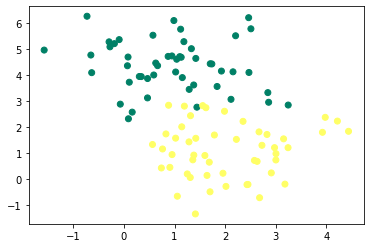

In [71]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0],1))
print(X)
print(X.shape[0])
print(X[0].shape)
print(y)
print(X.shape)
print(y.shape)
plt.scatter(X[:, 0],X[:, 1],c=y , cmap ='summer')
plt.show()

In [3]:
#take a parameters X and return W,b 
def Initialisation(X):
    W = np.random.rand(X.shape[1],1)
    b = np.random.rand(1)
    print('b =', b)
    print('W shape is', W.shape)
    print('b shape is', b.shape)
    return (W,b) 

In [4]:
def Model(X,W,b):
    Z = X.dot(W) + b 
    #print("Z shape is", Z.shape)
    A = 1/(1+np.exp(-Z))
    return A

In [5]:
def Cost(A,y):
    epsilon =1e-15
    return (1 / len(y)) * np.sum(-y * np.log(A+epsilon) - (1-y) * np.log(1-A+epsilon))                  

In [6]:
def gradients(A, X, y):
    m=len(y)
    dW= 1/m * np.dot(X.T, A-y) 
    db= 1/m * np.sum(A-y)
    return (dW,db) 
    

In [7]:
def Update(W,b,dW,db, learning_rate):
    W = W - learning_rate*dW
    b = b - learning_rate*db
    return (W,b)

In [8]:
def predict(X, W, b):
    A = Model(X, W, b)
    return A >= 0.5

In [44]:
def artificial_neuron(X, y, learning_rate=0.1 ,n_iter =1000):
    W,b = Initialisation(X)
    Loss=[]
    for i in range(n_iter): 
        A = Model(X,W,b)
        #if i==0 :
          #print('A is:',A)
          #print('A shape is ',A.shape)
        Loss.append(Cost(A,y))
        dW ,db = gradients(A, X, y)
        W, b = Update(W,b,dW,db, learning_rate)
    y_pred = predict(X,W,b)
    print(accuracy_score(y,y_pred))
    plt.plot(Loss)
    plt.show()
    
    return (W, b)

In [72]:
def artificial_neuron2(X, y, learning_rate=0.1 ,n_iter =1000):
    W,b = Initialisation(X)
    W[0], W[1] = -7.5, -7.5
    nb = 10
    j = 0
    history = np.zeros((n_iter // nb, 5))
    Loss=[]
    
    # Training 
    for i in range(n_iter): 
        A = Model(X,W,b)
        Loss.append(Cost(A,y))
        dW ,db = gradients(A, X, y)
        W, b = Update(W,b,dW,db, learning_rate)
        if( i % nb == 0):
            history[j, 0]= W[0]
            history[j, 1]= W[1]
            history[j, 2]= b
            history[j, 3]= i
            history[j, 4]= Cost(A,y)
            j+=1
    plt.plot(Loss)
    plt.show()
    
    return (history, b)

b = [0.32773733]
W shape is (2, 1)
b shape is (1,)


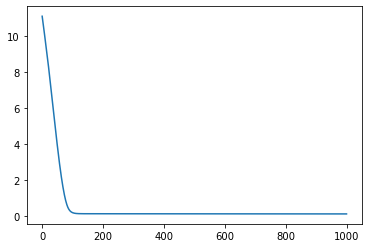

In [73]:
history, b=artificial_neuron2(X, y)

In [11]:
W, b

(array([[ 1.20698733],
        [-1.08120758]]),
 array([0.66360221]))

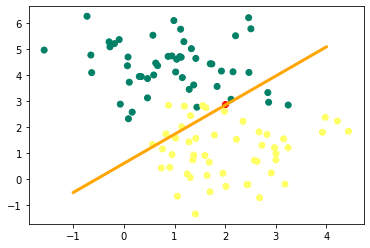

In [12]:
x0 = np.linspace(-1,4,100)
x1 = (-W[0]*x0 - b)/W[1]

new_plant = np.array([2, 2.9])
plt.scatter(X[:, 0],X[:, 1],c=y , cmap ='summer')
plt.scatter(new_plant[0], new_plant[1] , c='r' )
plt.plot(x0,  x1,c='orange', lw=3)
plt.show()


In [13]:
predict(new_plant, W, b)

array([False])

In [14]:
print(W)
print(W[0])

[[ 1.20698733]
 [-1.08120758]]
[1.20698733]


In [15]:
1- 11/100

0.89

In [16]:
#!pip install h5py 
from utilities import *

In [17]:
X_train, Y_train, X_test, Y_test = load_data()
#print(X_train.shape)
#print (X_train)
print(Y_train.shape)


(1000, 1)


In [18]:
from sklearn import preprocessing


In [19]:
X_trainreshaped = X_train.reshape(X_train.shape[0],-1)
normalized_Xtrain = preprocessing.normalize(X_trainreshaped)
print(X_trainreshaped.shape)
print(X_trainreshaped)
print(normalized_Xtrain)

(1000, 4096)
[[164 174 163 ...  87 180  39]
 [ 42  43  39 ...  55  52  55]
 [ 27  26  29 ... 135 141 121]
 ...
 [ 47  68 142 ... 202 202 203]
 [252 252 252 ...  64  66  59]
 [122 126 130 ... 161 160 160]]
[[0.01662782 0.01764171 0.01652643 ... 0.00882086 0.01825005 0.00395418]
 [0.00589972 0.00604019 0.00547831 ... 0.00772582 0.00730441 0.00772582]
 [0.00279099 0.00268762 0.00299773 ... 0.01395493 0.01457515 0.01250775]
 ...
 [0.00463769 0.00670985 0.01401174 ... 0.0199322  0.0199322  0.02003087]
 [0.02803068 0.02803068 0.02803068 ... 0.0071189  0.00734137 0.00656274]
 [0.01550932 0.01601782 0.01652632 ... 0.02046721 0.02034009 0.02034009]]


In [20]:
X_testreshaped = X_test.reshape(X_test.shape[0], -1)
X_testreshaped.shape

(200, 4096)

In [21]:
W = np.random.rand(X_trainreshaped.shape[1],1)
print(W)
b = np.random.rand(1)
Z = normalized_Xtrain.dot(W) + b 
print(Z)
print(Z.shape)
A=1/(1+np.exp(-Z))
print(1-A)

[[0.41372255]
 [0.15783832]
 [0.01998178]
 ...
 [0.80606041]
 [0.31577062]
 [0.63692535]]
[[29.02503503]
 [29.09544791]
 [28.48964111]
 [27.11926716]
 [31.3435335 ]
 [29.36685337]
 [28.79686577]
 [24.84938857]
 [28.37416154]
 [25.23595082]
 [27.63895594]
 [28.26726268]
 [27.69348679]
 [29.27387695]
 [28.68365455]
 [27.10442981]
 [29.66754979]
 [30.43011943]
 [29.06265169]
 [28.36897705]
 [28.91786436]
 [28.75199702]
 [30.89466961]
 [27.95742178]
 [29.03184428]
 [31.83156682]
 [31.32371054]
 [27.17928718]
 [28.08426216]
 [27.01745842]
 [29.33160607]
 [30.20480959]
 [28.14315617]
 [28.29610631]
 [28.99237551]
 [28.71468385]
 [30.20728578]
 [31.25574474]
 [29.94450469]
 [29.3429087 ]
 [31.02066576]
 [27.04497122]
 [28.33947643]
 [26.40870034]
 [26.34625774]
 [30.10536652]
 [29.75929689]
 [28.75012979]
 [29.67410765]
 [27.69953458]
 [27.69748284]
 [29.96333199]
 [28.40442298]
 [30.75275013]
 [28.02005523]
 [28.48384622]
 [28.25288536]
 [29.24500399]
 [30.58256159]
 [26.56616881]
 [26.49959

b = [0.75848308]
W shape is (4096, 1)
b shape is (1,)


/tmp/ipykernel_7127/1867484688.py:4: RuntimeWarning: overflow encountered in exp
  A = 1/(1+np.exp(-Z))


0.546


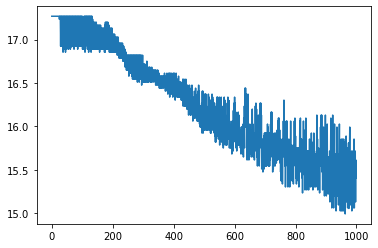

In [67]:
W, b= artificial_neuron(X_trainreshaped, Y_train)

In [23]:
#print(X)
print(X_train)
print(X_train.shape)
wtest = np.random.rand(X.shape[1],1)
btest = np.random.rand(1)
print(wtest,btest)

[[[164 174 163 ... 144 131 134]
  [162 174 182 ... 143 144 128]
  [158 169 187 ... 158 143 151]
  ...
  [175 168 166 ...  91 176 173]
  [167 166 166 ...  45 184 124]
  [176 172 168 ...  87 180  39]]

 [[ 42  43  39 ...  47  46  42]
  [ 38  44  42 ...  40  47  42]
  [ 45  46  36 ...  43  40  38]
  ...
  [ 87  85  70 ...  75  78  82]
  [ 70  70  71 ...  52  67  68]
  [ 64  61  60 ...  55  52  55]]

 [[ 27  26  29 ...  84  82  84]
  [ 29  27  28 ...  89  88  89]
  [ 28  32  27 ...  88  90  86]
  ...
  [101  92  17 ... 112 119 123]
  [173 178 175 ... 141 137 138]
  [ 10  11  26 ... 135 141 121]]

 ...

 [[ 47  68 142 ...  39  35  33]
  [ 55  68 159 ...  54  41  44]
  [ 58  75 141 ...  40  58  63]
  ...
  [163 169 167 ... 206 212 207]
  [168 165 167 ... 209 205 198]
  [167 168 167 ... 202 202 203]]

 [[252 252 252 ... 158 171 173]
  [252 252 252 ... 151 163 166]
  [252 252 252 ... 142 155 164]
  ...
  [215 203 185 ...  52  57  67]
  [209 214 204 ...  66  59  58]
  [200 210 222 ...  64  66  

In [75]:
lim =10
h=100
W1 = np.linspace(-lim,lim, h)
W2 = np.linspace(-lim,lim, h)

W11, W22 = np.meshgrid(W1,W2)
print(W1)
print('W1 shape is', W1.shape)
#print(W2)
print('toto')
print(W11)
print('W11 shape is', W11.shape)
#print('aplatir W11')
#print(W11.ravel())
print('titi')
print(W22)
#print('aplatir W22')
#print(W22.ravel())
#print(W22.shape)
#print (W22.ravel().shape)

W_final = np.c_[W11.ravel(), W22.ravel()].T
print(W_final.shape)
print(W_final)

[-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919
  -8.98989899  -8.78787879  -8.58585859  -8.38383838  -8.18181818
  -7.97979798  -7.77777778  -7.57575758  -7.37373737  -7.17171717
  -6.96969697  -6.76767677  -6.56565657  -6.36363636  -6.16161616
  -5.95959596  -5.75757576  -5.55555556  -5.35353535  -5.15151515
  -4.94949495  -4.74747475  -4.54545455  -4.34343434  -4.14141414
  -3.93939394  -3.73737374  -3.53535354  -3.33333333  -3.13131313
  -2.92929293  -2.72727273  -2.52525253  -2.32323232  -2.12121212
  -1.91919192  -1.71717172  -1.51515152  -1.31313131  -1.11111111
  -0.90909091  -0.70707071  -0.50505051  -0.3030303   -0.1010101
   0.1010101    0.3030303    0.50505051   0.70707071   0.90909091
   1.11111111   1.31313131   1.51515152   1.71717172   1.91919192
   2.12121212   2.32323232   2.52525253   2.72727273   2.92929293
   3.13131313   3.33333333   3.53535354   3.73737374   3.93939394
   4.14141414   4.34343434   4.54545455   4.74747475   4.94949495
   5.151515

In [76]:
b=0 
Z = X.dot(W_final)+b
print(Z)
A = 1 /(1 +np.exp(-Z))
A.shape
epsilon =1e-15
L = (1 / len(y)) * np.sum(-y * np.log(A+epsilon) - (1-y) * np.log(1-A+epsilon), axis=0).reshape(W11.shape) 
L.shape


[[-64.5269508  -63.67472788 -62.82250495 ...  62.82250495  63.67472788
   64.5269508 ]
 [-13.67642484 -13.49303113 -13.30963742 ...  13.30963742  13.49303113
   13.67642484]
 [-48.04752402 -48.10338771 -48.1592514  ...  48.1592514   48.10338771
   48.04752402]
 ...
 [-39.8990323  -39.29202455 -38.68501681 ...  38.68501681  39.29202455
   39.8990323 ]
 [-34.53419278 -34.66300647 -34.79182016 ...  34.79182016  34.66300647
   34.53419278]
 [-25.71858639 -25.55094356 -25.38330073 ...  25.38330073  25.55094356
   25.71858639]]


(100, 100)

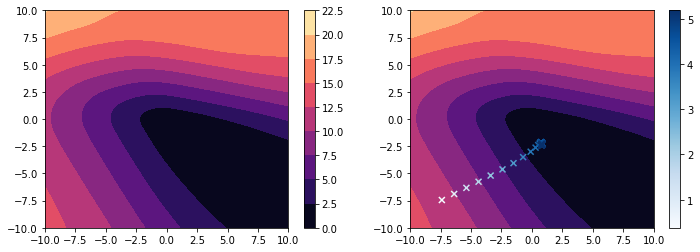

In [77]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.contourf(W11, W22, L, cmap='magma')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.contourf(W11, W22, L, cmap='magma')
plt.scatter(history[:,0], history[:, 1], c=history[:,2], cmap ='Blues', marker ='x')
plt.colorbar()


In [35]:
print(X)
print(X[:,0])

[[ 4.21850347  2.23419161]
 [ 0.90779887  0.45984362]
 [-0.27652528  5.08127768]
 [ 0.08848433  2.32299086]
 [ 3.24329731  1.21460627]
 [ 1.44193252  2.76754364]
 [ 1.0220286   4.11660348]
 [ 3.97820955  2.37817845]
 [ 0.58894326  4.00148458]
 [ 1.25185786  0.20811388]
 [ 0.62835793  4.4601363 ]
 [ 1.68608568  0.65828448]
 [ 1.18454506  5.28042636]
 [ 0.06897171  4.35573272]
 [ 1.78726415  1.70012006]
 [ 4.4384123   1.84214315]
 [ 3.18190344 -0.18226785]
 [ 0.30380963  3.94423417]
 [ 0.73936011  0.43607906]
 [ 1.28535145  1.43691285]
 [ 1.1312175   4.68194985]
 [ 0.66471755  4.35995267]
 [ 1.31570453  2.44067826]
 [-0.18887976  5.20461381]
 [ 2.57854418  0.72611733]
 [ 0.87305123  4.71438583]
 [ 1.3105127   0.07122512]
 [ 0.9867701   6.08965782]
 [ 1.42013331  4.63746165]
 [ 2.3535057   2.22404956]
 [ 2.43169305 -0.20173713]
 [ 1.0427873   4.60625923]
 [ 0.95088418  0.94982874]
 [ 2.45127423 -0.19539785]
 [ 1.62011397  2.74692739]
 [ 2.15504965  4.12386249]
 [ 1.38093486  0.92949422]
 